# Detecting edges in text

In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Staff201\AppData\Local\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread('1.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

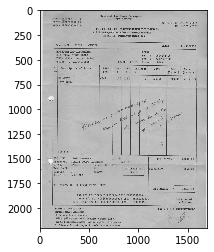

In [4]:
plt.imshow(img, cmap='gray')

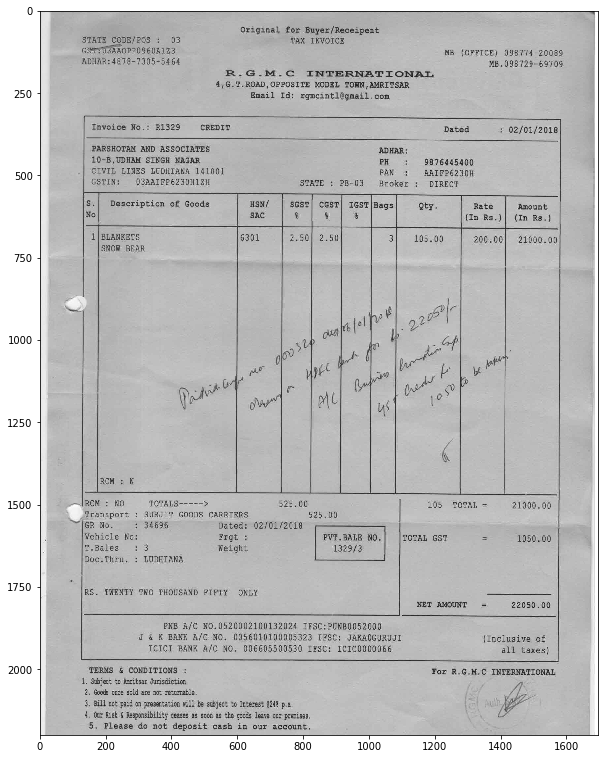

In [5]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

display(img, cmap='gray')

In [22]:
def preprocess(img):
    rgb = cv2.pyrDown(img)
    img = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#     display(grad, cmap='gray')
    ret, thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (19,3))
    connected = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel=kernel_rect)
#     display(connected, cmap='gray')
    ker = np.ones((11,11), dtype=np.uint8)
    dilated = cv2.dilate(connected, kernel=ker)
#     display(diluted, cmap='gray')
    
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(len(contours))
    
    mask = np.zeros(thresh.shape, dtype=np.uint8)
#     display(mask, cmap='gray')
    
    for idx in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[idx])
        mask[y:y+h, x:x+w] = 0
        cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
        r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
        if r >0.45 and w > 8 and h > 8:
            tex = pytesseract.image_to_string(img[y:y+h, x:x+w])
#             ro = img[y-4:y+h+4, x-4:x+w+4]
#             display(ro, cmap='gray')
            cv2.rectangle(rgb, ((x),(y)), (x+(w),y+(h)), (0,255,0), 2)
            print(tex)
    display(rgb, cmap='gray')
#     return contours

In [30]:
# def preprocess(img, rect_kernel=(9,3)):
# #     rgb = cv2.pyrDown(img)
#     rgb = img.copy()
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#     grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# #     display(grad, cmap='gray')
#     ret, thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, rect_kernel)
#     connected = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel=kernel)
# #     display(connected, cmap='gray')
    
#     contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     print(len(contours))
    
#     mask = np.zeros(thresh.shape, dtype=np.uint8)
# #     display(mask, cmap='gray')
    
#     for idx in range(len(contours)):
#         x,y,w,h = cv2.boundingRect(contours[idx])
#         mask[y:y+h, x:x+w] = 0
#         cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
#         r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
#         if r >0.45 and w > 8 and h > 8:
# #             tex = pytesseract.image_to_string(img[y:y+h, x:x+w])
# #             ro = img[y-4:y+h+4, x-4:x+w+4]
# #             display(ro, cmap='gray')
#             cv2.rectangle(rgb, (x,y), (x+w,y+h), (0,255,0), 2)
# #             print(tex)
#     display(rgb, cmap='gray')
#     return contours

14








Invoice No.: R1329 CREDIT Dated : 02/01/2018

 

 

 

 

 

 

 

 

 

   

   

PARSHOTAM AND ASSOCIATES ADHAR:
10-B,UDHAM SINGH NAGAR PH 3 9876445400
CIVIL LINES LUDHIANA 141001 PAN AAIFP6230H
GSTIN: O3AATFP6230H12H STATE : PB-03 | Broker : DIRECT
8.| Description of Goods sw/ | scst| cost| 1cst|Bags| ty. Rate | Amount
No ‘SAC s s s (In Rs.)| (In Rs.)
1/BLANKETS 6301 2.50] 2.50 105.00 200.00) 21000.00
SNOW BEAR
¥] ol
wail! Me oe

 

 

 

 

    

ROM: N
RCM: NO ‘TOTALS 525.00 105 TOTAL = —-21000.00
Transport : SURJIT GOODS CARRIERS 525.00
IGR No. 34696 Dated: 02/01/2018
Wehicle Ni Frgt TOTAL GST = 1050.00
T.Bales : 3 Weight
Doc.Thru. : LUDHIANA
RS. TWENTY TWO THOUSAND FIFTY ONLY _——

NET AMOUNT = — 22050.00

 

PNB A/C NO.0520002100132024 IFSC:PUNBO052000

 

 

 

 

J & K BANK A/C NO. 0056010100005323 IFSC: JAKAOGURUJI (Inclusive of
ICICI BANK A/C NO, 006605500530 IFsc: Icrco000066 all taxes)
TERMS & CONDITIONS : For R.G.M.C INTERNATIONAL
1. Subject to Aaritear Jurisdi

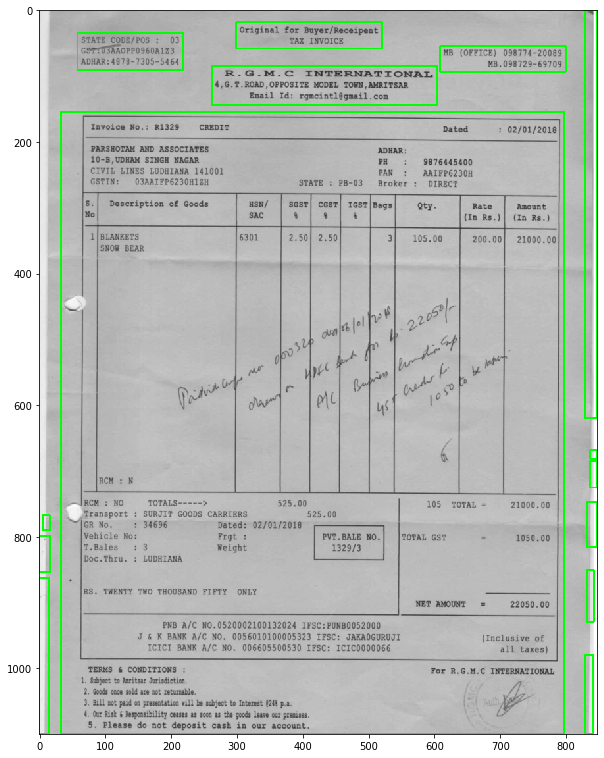

In [23]:
cnts = preprocess(img)

In [220]:
# def detection(img,contours):
#     mask = np.zeros(img.shape[:2], dtype=np.uint8)
#     for idx in range(len(contours)):
#         x,y,w,h = cv2.boundingRect(contours[idx])
#         mask[y:y+h, x:x+w] = 0
#         cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
#         r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
        
#         if r >0.45 and w > 8 and h > 8:
#             roi = img[y:y+h, x:x+w]
#             display(roi, cmap='gray')

In [14]:
img1 = cv2.imread('2.jpg')

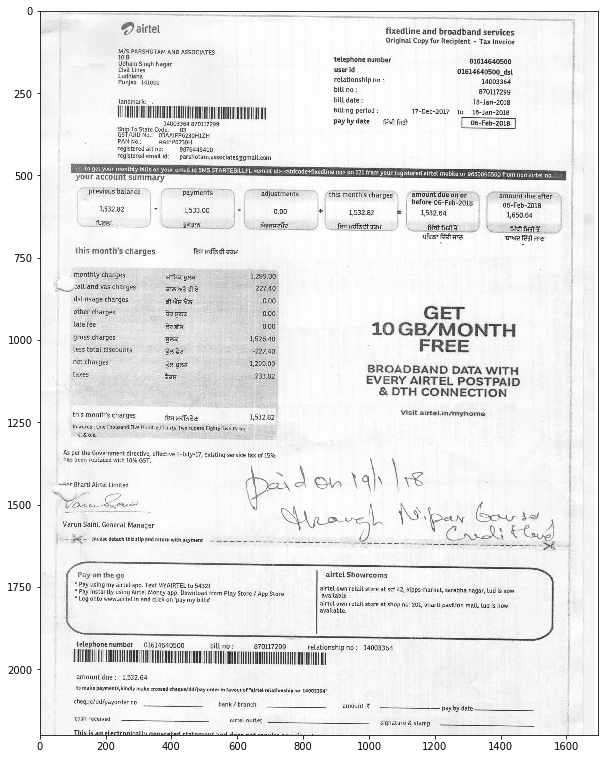

In [15]:
display(img1)

60

‘airtel outlet

 

signature & stamp
cash received
amount ©

 

— pay by date.
‘bank / branch
amount due: 1,532.64
{woman payments Andy make rnd cheun//pay order intavor oat ainsi ne 4003364"

heque/ /payorder no Sak neh




VA ow

cee pen) iets]

ween enna EE se-4

—Kee Bharti Airtel Limited

NAL ue





‘As per the Government directive, effective 1-)uy-17, existing service tax of 15%
hhas been replaced with 18% GST, ”



this month's charges fen ibe 153282

‘mor: One Teun Fie MandredTity Tmo rupee hy Tmo Pasa
Visit airtel.in/myhome
BROADBAND DATA WITH
EVERY AIRTEL POSTPAID
& DTH CONNECTION


GET
10 GB/MONTH
FREE


1,299.00
2740
0.00
0.00
0.00
1526.40
“227.40
1,299.00
73.82
tira a
wan a?
‘monthly charges:
zal and vas charges:
dsl usage charges
other charges
late fee
ross charges
less total discounts
net charges
taxes
fem 8 sa
this month's charges




1,532.82

‘adjustments ~~ this month's charges, amoUnt due oor) “amount due after >)

before og-Feb-2018 | | “Oe-reb-2018
om asa + |

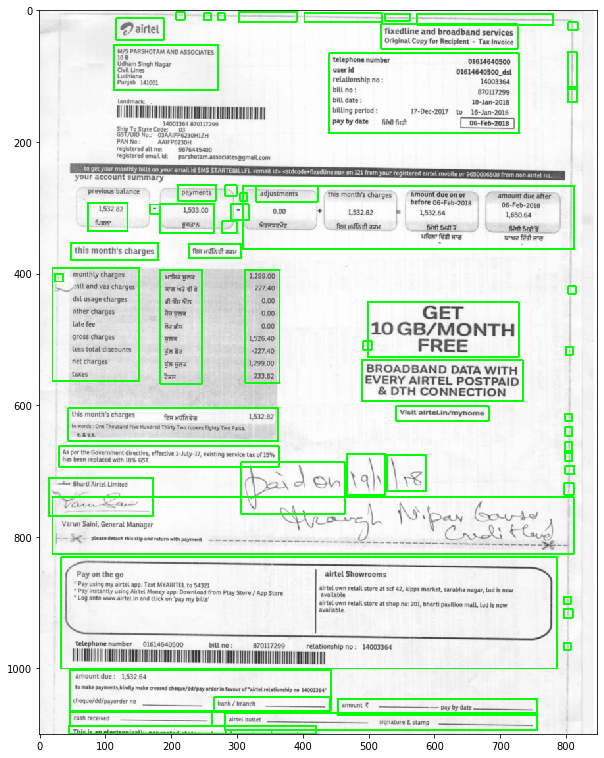

In [16]:
img1_cnts = preprocess(img1)

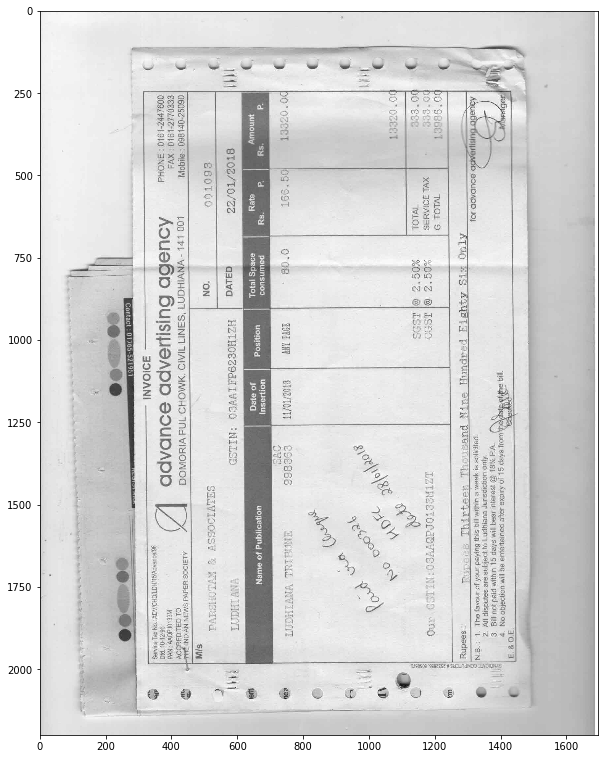

In [17]:
img2 = cv2.imread('3.jpg')
display(img2)

46






¢











te eter
























‘quo uoHRIpsun eveRYpN 01 oalgns Ove SOINGSHP YZ

 

 

 

 

    
     

  
 
 

 

 

Pry

         

  

yd WY B1OZ/TO/TT

 

 

 

 

      

 

 

 

 

8T0Z/T0/zz aaiva | HZTHOEZodaIv¥EO
e60t00 ‘ON
060S2-0r 1860 ah 100 LL - WNVIHGN1 "SANIT TIAID "MMOHO Nd VINOWOG
€LE0LLZ-1910 4
coxeisio aca = ©AOUCHD BulsiyeAPO SOUDAPD

{2OUOAPO 10} pongyos 5} yoam e UKM Ina Sin BuIKed snk jo unoNe} OWL“ -@N|
ATUO ETS AFUBTT Peapunyy SUTN Puy seedny
W1oL’9
Xvi 3010835, “OS*Z @| LSDO ‘0
WLOL xOS*Z @| LSOS

 

 

 

 

BOIOANI

 

 

        

>




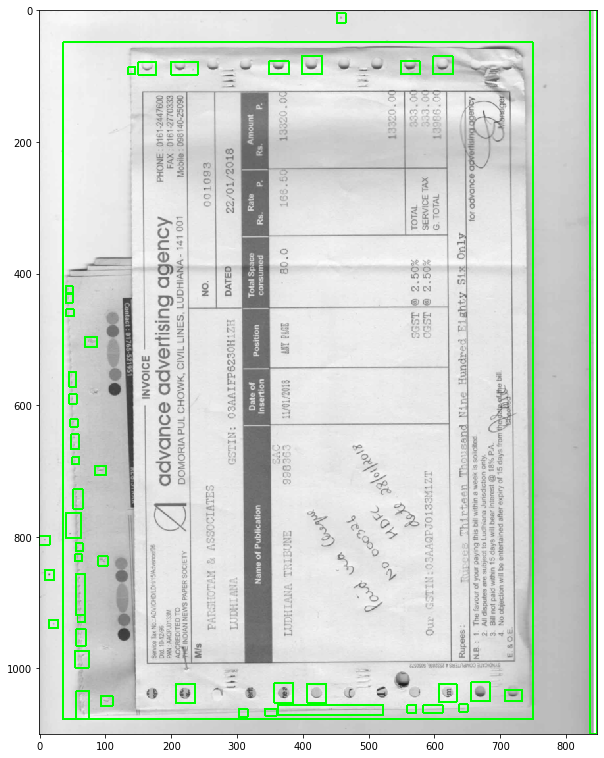

In [18]:
preprocess(img2)

In [21]:
cv2.imwrite('new_img.jpg',img)

True